In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np

In [47]:

# Data
data = {
    'Number UEs str': [16, 32, 64, 128, 256, 512, 1024],
    'Avg CPU (millicores)': [0.00073, 0.00075, 0.00085, 0.00091, 0.00097, 0.00103, 0.00109],
    'Std Dev CPU': [0.00026, 0.00019, 0.00034, 0.00027, 0.00039, 0.00041, 0.00038],
    'Avg Memory (MB)': [6.68, 6.69, 7.25, 7.49, 7.53, 7.57, 7.61],
    'Std Dev Memory': [0.47, 0.4, 0.51, 0.6, 0.53, 0.61, 0.46],
    'Total Handover Time (ms)': [0.03235241292 * 1000, 0.06186197768 * 1000, 0.1249251588 * 1000, 0.2375379822 * 1000, 0.3819826971 * 1000, 0.5210820566 * 1000, 0.5923935014 * 1000],
    'Std Dev (Total Handover Time)': [0.01 * 1000, 0.015 * 1000, 0.016 * 1000, 0.028 * 1000, 0.043 * 1000, 0.059 * 1000, 0.093 * 1000],
    'Handover Count': [16, 30, 60, 113, 180, 241, 269],
    'Handover Time by UE(ms)': [0.002022025808 * 1000, 0.002062065923 * 1000, 0.00208208598 * 1000, 0.002102106038 * 1000, 0.002122126095 * 1000, 0.00216216621 * 1000, 0.002202206325 * 1000],
    'Std Dev (Handover Time by UE)': [0.000625 * 1000, 0.00046875 * 1000, 0.00025 * 1000, 0.00021875 * 1000, 0.00016796875 * 1000, 0.000115234375 * 1000, 0.0000908203125 * 1000]
}


df = pd.DataFrame(data)

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="whitegrid")

CPU Fit: 0.000*x^2 + 0.000*x + 0.000
Memory Fit: -0.374*x^2 + 2.151*x + 4.526


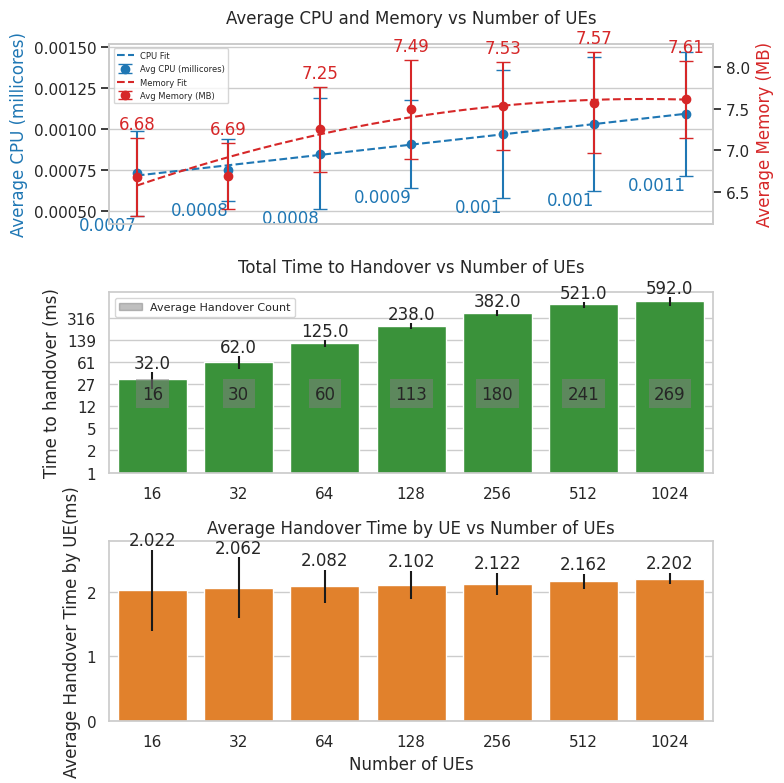

In [48]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=False)

# Line plot for Avg. CPU and Avg. Memory vs Number UEs str with two y-axes
ax1 = axs[0]
ax2 = ax1.twinx()

ax1.errorbar(df['Number UEs number'], df['Avg CPU (millicores)'], yerr=df['Std Dev CPU'], fmt='o', capsize=5, label='Avg CPU (millicores)', color='tab:blue')
ax2.errorbar(df['Number UEs number'], df['Avg Memory (MB)'], yerr=df['Std Dev Memory'], fmt='o', capsize=5, label='Avg Memory (MB)', color='tab:red')

# Fit polynomial curve
cpu_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg CPU (millicores)'], 2)
memory_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg Memory (MB)'], 2)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(min(df['Number UEs number']), max(df['Number UEs number']), 500)
log_x_values = np.log10(x_values)

# Calculate y values for the polynomial curve
cpu_poly_y = np.polyval(cpu_poly_coeff, log_x_values)
memory_poly_y = np.polyval(memory_poly_coeff, log_x_values)

# Print fit equations
cpu_fit_eq = f"CPU Fit: {cpu_poly_coeff[0]:.3f}*x^2 + {cpu_poly_coeff[1]:.3f}*x + {cpu_poly_coeff[2]:.3f}"
memory_fit_eq = f"Memory Fit: {memory_poly_coeff[0]:.3f}*x^2 + {memory_poly_coeff[1]:.3f}*x + {memory_poly_coeff[2]:.3f}"

print(cpu_fit_eq)
print(memory_fit_eq)

ax1.plot(x_values, cpu_poly_y, '--', color='tab:blue', label='CPU Fit')
ax2.plot(x_values, memory_poly_y, '--', color='tab:red', label='Memory Fit')

ax1.set_title('Average CPU and Memory vs Number of UEs', pad=15)
ax1.set_xscale('log')
ax1.set_ylabel('Average CPU (millicores)')
ax2.set_ylabel('Average Memory (MB)')
axs[0].yaxis.label.set_color('tab:blue')
ax2.yaxis.label.set_color('tab:red')

# Annotate the values for Avg. CPU
for i, v in enumerate(df['Avg CPU (millicores)']):
    ax1.annotate(str(round(v, 4)), (df['Number UEs number'][i], v - df['Std Dev CPU'][i]), ha='right', va='top', color='tab:blue')

# Annotate the values for Avg. Memory
for i, v in enumerate(df['Avg Memory (MB)']):
    ax2.annotate(str(round(v, 2)), (df['Number UEs number'][i], v + df['Std Dev Memory'][i] + 0.06), ha='center', va='bottom', color='tab:red')

# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)

# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Add legends
# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', prop={'size': 6})

# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs number', y='Total Handover Time (ms)', yerr=df['Std Dev (Total Handover Time)'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Total Time to Handover vs Number of UEs',pad=15)
axs[1].set_ylabel('Time to handover (ms)')
axs[1].set_yscale('log')
# Set more yticks for the second subplot
yticks = np.logspace(0, 2.5, num=8)
axs[1].set_yscale('log')
axs[1].set_yticks(yticks)
axs[1].set_yticklabels([f'{y:.0f}' for y in yticks])
axs[1].set_xlabel('')  # Hide x label

# Annotate the values of each bar
for i, v in enumerate(df['Total Handover Time (ms)']):
    axs[1].annotate(str(round(v, 0)), (i, v + df['Std Dev (Total Handover Time)'][i] + 0.01), ha='center', va='bottom')

# Annotate the values of each bar
for i, v in enumerate(df['Handover Count']):
    axs[1].annotate(str(round(v, 0)), (i, min(df['Total Handover Time (ms)'])-6), ha='center', va='top',
                    bbox=dict(facecolor='gray', alpha=0.5, edgecolor='none'))
annotation_patch = mpatches.Patch(color='gray', label='Average Handover Count', alpha=0.5)
axs[1].legend(handles=[annotation_patch], prop={'size': 8})

# Bar plot for Time by UE vs Number UEs str
sns.barplot(x='Number UEs number', y='Handover Time by UE(ms)', yerr=df['Std Dev (Handover Time by UE)'], data=df, ax=axs[2], color='tab:orange')
axs[2].set_title('Average Handover Time by UE vs Number of UEs')
axs[2].set_xlabel('Number of UEs')
axs[2].set_ylabel('Average Handover Time by UE(ms)')


# Annotate the values of each bar
for i, v in enumerate(df['Handover Time by UE(ms)']):
    axs[2].annotate(str(round(v, 3)), (i, v + df['Std Dev (Handover Time by UE)'][i] + 0.01), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-handover.pdf', bbox_inches='tight')
plt.savefig('out/xApp-handover.png', dpi=300, bbox_inches='tight')
plt.show()